# Tamil Character Recognition (Vowels)

In [ ]:
import cv2
import numpy as np
from keras.models import load_model

# Load the CNN model
hybrid_cnn_model = load_model('hybrid_model (1).h5')

# Define the Unicode mapping dictionary
unicode_mapping = {
    '000': 'அ',
    '001': 'ஆ',
    '002': 'இ',
    '003': 'ஈ',
    '004': 'உ',
    '005': 'ஊ',
    '006': 'எ',
    '007': 'ஏ',
    '008': 'ஐ',
    '009': 'ஒ',
    '010': 'ஓ',
    '155': 'ஔ'
}

unicode_map = {int(key): value for key, value in unicode_mapping.items()}

# Load and preprocess the image
def preprocess_image(image_path):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize the image to match the expected input shape of the model
    image = cv2.resize(image, (120, 120))
    # Normalize pixel values to [0, 1]
    image = image.astype('float32') / 255.0
    # Reshape the image to add batch dimension and channel dimension
    image = image.reshape(1, 120, 120, 1)  # Assuming grayscale input
    return image

# Function to predict character using the CNN model
def cnn_model_predict(image):
    prediction = hybrid_cnn_model.predict(image)
    # Extract the index of the maximum value from the prediction array
    predicted_class_index = np.argmax(prediction)
    # Map predicted category value to Unicode character
    predicted_character = unicode_map[predicted_class_index]
    return predicted_character

# Define the path to the image file
image_path = 'u16_002t10.tiff'

# Preprocess the image
image = preprocess_image(image_path)

# Predict the character using the CNN model
predicted_character = cnn_model_predict(image)


1/1 [==============================] - 0s 312ms/step


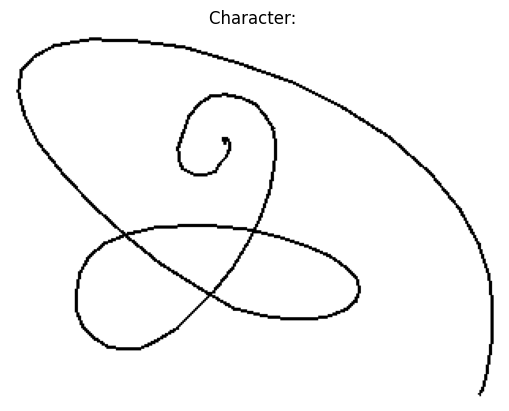

Predicted character: இ


In [ ]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Display the image using Matplotlib
# Load the image using OpenCV, specifying grayscale mode
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the image using Matplotlib
plt.imshow(image, cmap='gray')  # Show the grayscale image
plt.title(f"Character: ")       # Set the title of the plot
plt.axis('off')                 # Turn off axis labels
plt.show()                      # Show the plot

# Print the predicted character
print("Predicted character:", predicted_character)